# 2.Scarping Books to Scrape.

In [32]:
from bs4 import BeautifulSoup as bs
from urllib.request import Request, urlopen
url = "http://books.toscrape.com/"
page = urlopen(url)
soup = bs(page, "html.parser")

## Book titles:

In [28]:
# Find all book containers
books = soup.find_all("article", class_="product_pod")
# Extract titles
titles = [book.h3.a["title"] for book in books]

for t in titles:
    print(t)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


## prices:

In [29]:
for book in books:
    title = book.h3.a["title"]
    price_tag = book.find("p", class_="price_color")
    price = book.find("p", class_="price_color").get_text(strip=True)
    print(f"{title} — {price}")

A Light in the Attic — £51.77
Tipping the Velvet — £53.74
Soumission — £50.10
Sharp Objects — £47.82
Sapiens: A Brief History of Humankind — £54.23
The Requiem Red — £22.65
The Dirty Little Secrets of Getting Your Dream Job — £33.34
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull — £17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics — £22.60
The Black Maria — £52.15
Starving Hearts (Triangular Trade Trilogy, #1) — £13.99
Shakespeare's Sonnets — £20.66
Set Me Free — £17.46
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) — £52.29
Rip it Up and Start Again — £35.02
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 — £57.25
Olio — £23.88
Mesaerion: The Best Science Fiction Stories 1800-1849 — £37.59
Libertarianism for Beginners — £51.33
It's Only the Himalayas — £45.17


## Availability: 

In [30]:
for book in books:
    title = book.h3.a["title"]
    avail_tag = book.find("p", class_="instock availability")
    availability = book.find("p", class_="instock availability").get_text(strip=True)
    print(f"{title}  — {availability}")

A Light in the Attic  — In stock
Tipping the Velvet  — In stock
Soumission  — In stock
Sharp Objects  — In stock
Sapiens: A Brief History of Humankind  — In stock
The Requiem Red  — In stock
The Dirty Little Secrets of Getting Your Dream Job  — In stock
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull  — In stock
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics  — In stock
The Black Maria  — In stock
Starving Hearts (Triangular Trade Trilogy, #1)  — In stock
Shakespeare's Sonnets  — In stock
Set Me Free  — In stock
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)  — In stock
Rip it Up and Start Again  — In stock
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991  — In stock
Olio  — In stock
Mesaerion: The Best Science Fiction Stories 1800-1849  — In stock
Libertarianism for Beginners  — In stock
It's Only the Himalayas  — In stock


## Ratings

In [31]:
for book in books:
    title = book.h3.a["title"]
    rating_tag = book.find("p", class_="star-rating")
    rating = rating_tag["class"][1] 
    print(f"{title}  — {rating}")
    

A Light in the Attic  — Three
Tipping the Velvet  — One
Soumission  — One
Sharp Objects  — Four
Sapiens: A Brief History of Humankind  — Five
The Requiem Red  — One
The Dirty Little Secrets of Getting Your Dream Job  — Four
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull  — Three
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics  — Four
The Black Maria  — One
Starving Hearts (Triangular Trade Trilogy, #1)  — Two
Shakespeare's Sonnets  — Four
Set Me Free  — Five
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)  — Five
Rip it Up and Start Again  — Five
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991  — Three
Olio  — One
Mesaerion: The Best Science Fiction Stories 1800-1849  — One
Libertarianism for Beginners  — Two
It's Only the Himalayas  — Two


## Handle missing prices/ratings

In [39]:
for book in books:
    title = book.h3.a["title"]

    price_tag = book.find("p", class_="price_color")
    price = price_tag.get_text(strip=True) if price_tag else "N/A"

    avail_tag = book.find("p", class_="instock availability")
    availability = avail_tag.get_text(strip=True) if avail_tag else "N/A"

    rating_tag = book.find("p", class_="star-rating")
    rating = rating_tag["class"][1] if rating_tag and len(rating_tag["class"]) > 1 else "N/A"

    print(f"{title} — {price} — {availability} — {rating} stars")

    # the website is clean, nothing is missing

A Light in the Attic — £51.77 — In stock — Three stars
Tipping the Velvet — £53.74 — In stock — One stars
Soumission — £50.10 — In stock — One stars
Sharp Objects — £47.82 — In stock — Four stars
Sapiens: A Brief History of Humankind — £54.23 — In stock — Five stars
The Requiem Red — £22.65 — In stock — One stars
The Dirty Little Secrets of Getting Your Dream Job — £33.34 — In stock — Four stars
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull — £17.93 — In stock — Three stars
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics — £22.60 — In stock — Four stars
The Black Maria — £52.15 — In stock — One stars
Starving Hearts (Triangular Trade Trilogy, #1) — £13.99 — In stock — Two stars
Shakespeare's Sonnets — £20.66 — In stock — Four stars
Set Me Free — £17.46 — In stock — Five stars
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) — £52.29 — In stock — Five stars
Rip it Up and Start Again — £35.02 

## compute average price

In [40]:
total_price = 0
count = 0

for book in books:
    price_tag = book.find("p", class_="price_color")
    if price_tag:
        price_text = price_tag.get_text(strip=True) 
        price = float(price_text.lstrip("£"))        
        total_price += price
        count += 1

average_price = total_price / count if count else 0
print(f"Average Price: £{average_price:.2f}")


Average Price: £38.05


## Extracting details into a list

In [49]:
data = []
for book in books:
    title = book.h3.a["title"]

    price = book.find("p", class_="price_color").get_text(strip=True)

    availability = book.find("p", class_="instock availability").get_text(strip=True)

    rating_tag = book.find("p", class_="star-rating")
    rating_classes = rating_tag.get("class")
    rating = [r for r in rating_classes if r != "star-rating"][0]  # e.g. "Three"

    data.append([title, price, availability, rating])

## Storing the scraped content in a CSV file in a clean, columnar format.

In [42]:
import pandas as pd

df = pd.DataFrame(data, columns=["Title", "Price", "Availability", "Rating"])
df.to_csv("books.csv", index=False, encoding="utf-8")

print("Scraped data saved to books.csv using pandas")


Scraped data saved to books.csv using pandas


##  Conduct descriptive statistical analysis on the curated data

In [43]:
df = pd.read_csv("books.csv")

# Clean Price column (remove £ and convert to float)
df["Price"] = df["Price"].str.replace("£", "").astype(float)

# Convert Rating to numeric scale
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)

# Basic descriptive statistics
print("\n--- Price Statistics ---")
print(df["Price"].describe())

print("\n--- Rating Statistics ---")
print(df["Rating"].describe())

print("\n--- Availability Counts ---")
print(df["Availability"].value_counts())

# Example: Average price by rating
print("\n--- Average Price by Rating ---")
print(df.groupby("Rating")["Price"].mean())


--- Price Statistics ---
count    20.000000
mean     38.048500
std      15.135231
min      13.990000
25%      22.637500
50%      41.380000
75%      51.865000
max      57.250000
Name: Price, dtype: float64

--- Rating Statistics ---
count    20.000000
mean      2.850000
std       1.565248
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

--- Availability Counts ---
Availability
In stock    20
Name: count, dtype: int64

--- Average Price by Rating ---
Rating
1    40.018333
2    36.830000
3    42.316667
4    31.105000
5    39.750000
Name: Price, dtype: float64


## Histogram: Price Distribution (Skewness detection)

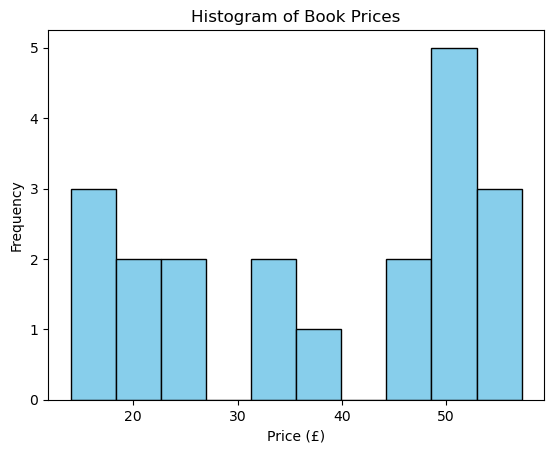

In [45]:
import matplotlib.pyplot as plt
plt.hist(df["Price"], bins=10, edgecolor="black", color="skyblue")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.title("Histogram of Book Prices")
plt.show()

## Boxplot: Outlier detection

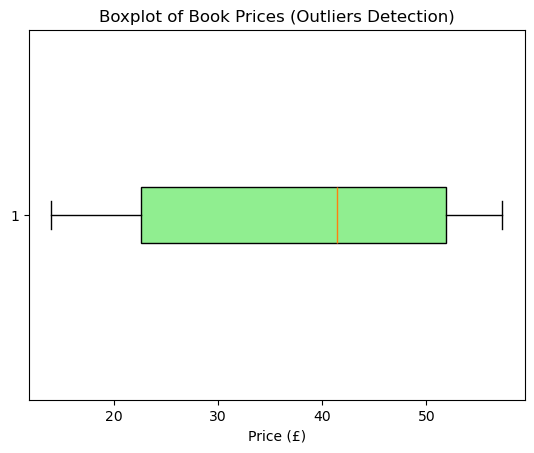

In [46]:
plt.boxplot(df["Price"], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightgreen"))
plt.xlabel("Price (£)")
plt.title("Boxplot of Book Prices (Outliers Detection)")
plt.show()

## Bar plot: Average Price by Rating

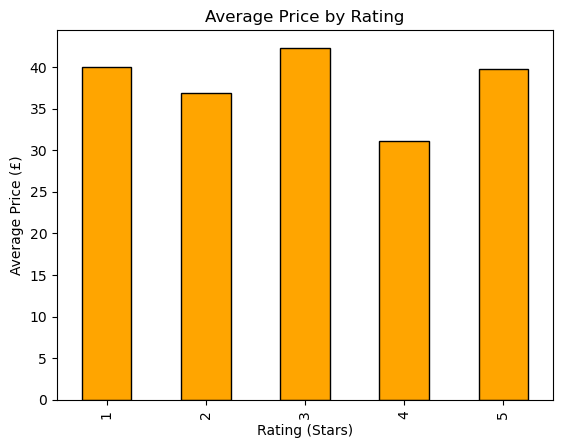

In [47]:
avg_price_by_rating = df.groupby("Rating")["Price"].mean()
avg_price_by_rating.plot(kind="bar", color="orange", edgecolor="black")
plt.xlabel("Rating (Stars)")
plt.ylabel("Average Price (£)")
plt.title("Average Price by Rating")
plt.show()

## Bar Plot: Count of Ratings

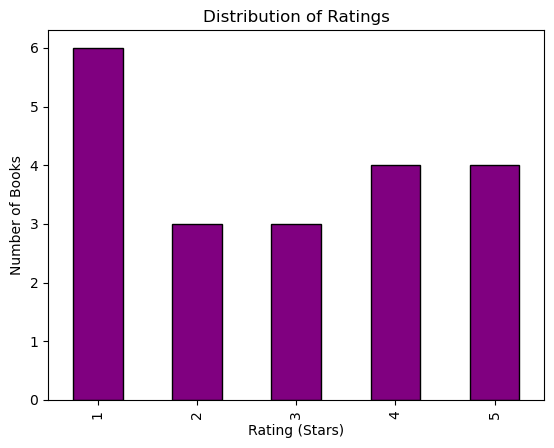

In [48]:
rating_counts = df["Rating"].value_counts().sort_index()
rating_counts.plot(kind="bar", color="purple", edgecolor="black")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Books")
plt.title("Distribution of Ratings")
plt.show()